In [65]:
import pandas as pd

In [66]:
herectvo = pd.read_json("herectvo.json")

In [67]:
herectvo = herectvo.explode("Role")
herectvo = herectvo.explode("Úloha")

In [4]:
# herectvo = herectvo[herectvo["Úloha"] == "Hrají"]

In [68]:
with open("dlouhometrazni.txt", "r", encoding = "utf-8") as dlouhometrazni:
    dlouhometrazni = dlouhometrazni.readlines()
    dlouhometrazni = [d.strip() for d in dlouhometrazni]

In [69]:
herectvo = herectvo[herectvo["Film"].isin(dlouhometrazni)]

## Herci x herečky

In [70]:
def gender(jmeno):
    if jmeno:
        gender = ""
        jmeno = jmeno.split("(")[0].strip()
        if jmeno[-1:] == "á":
            gender = "žena"
        elif jmeno[-3:] == "ova":
            gender = "žena"
        elif "Vica" in jmeno:
            gender = "žena"
        elif "Chantal" in jmeno:
            gender = "žena"
        elif "Lilian" in jmeno:
            gender = "žena"
        elif "Nataša" in jmeno:
            gender = "žena"
        elif "Beata" in jmeno:
            gender = "žena"
        else:
            gender = "muž"
    else:
        gender = None
    return gender

In [71]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x))

<AxesSubplot:xlabel='Rok'>

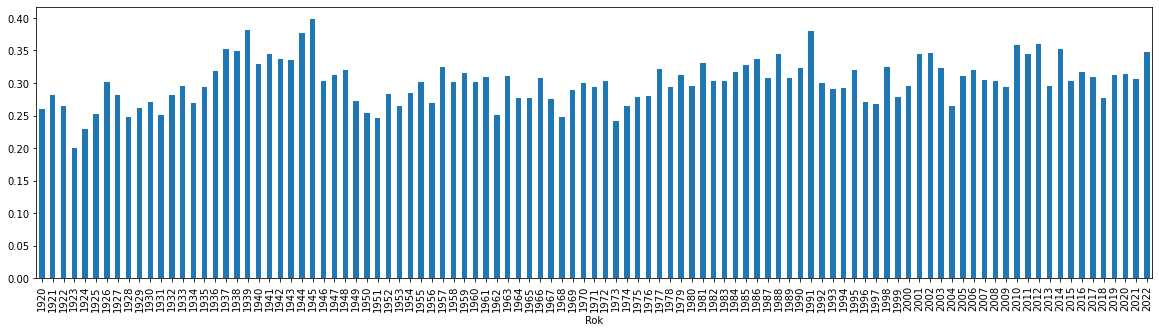

In [72]:
pd.Series((herectvo[herectvo["Gender"] == "žena"].groupby("Rok")["Jméno"].nunique()) / (herectvo.groupby("Rok")["Jméno"].nunique())).plot.bar(figsize = (20,5))

#POZN LOL

## Režie aj.

In [73]:
df = pd.read_json("filmy.json")

In [74]:
df = df[df["Film"].isin(dlouhometrazni)]

In [75]:
df = df.explode("Režie").explode("Scénář").explode("Dramaturg").explode("Původní filmový námět")

In [76]:
df["Režie gender"] = df["Režie"].apply(lambda x: gender(x))
df["Scénář gender"] = df["Scénář"].apply(lambda x: gender(x))
df["Dramaturg gender"] = df["Dramaturg"].apply(lambda x: gender(x))
df["Námět gender"] = df["Původní filmový námět"].apply(lambda x: gender(x))

In [77]:
rezie_gender = df[["Film","Režie gender","Scénář gender","Dramaturg gender","Námět gender"]]

## Věková distribuce

<AxesSubplot:ylabel='Frequency'>

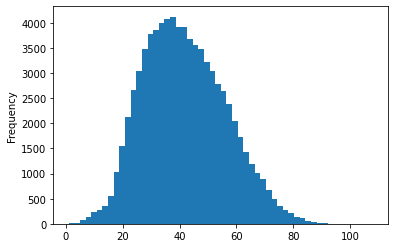

In [78]:
herectvo["Věk"].plot.hist(bins=54)

<AxesSubplot:ylabel='Frequency'>

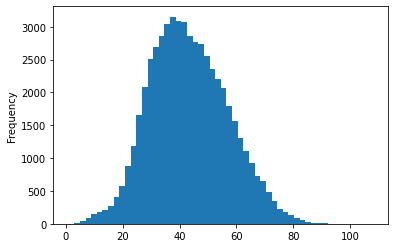

In [79]:
herectvo[herectvo["Gender"] == "muž"]["Věk"].plot.hist(bins=54)

<AxesSubplot:ylabel='Frequency'>

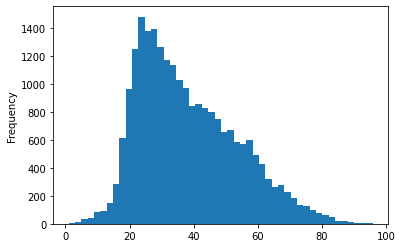

In [80]:
herectvo[herectvo["Gender"] == "žena"]["Věk"].plot.hist(bins=48)

<AxesSubplot:xlabel='Rok'>

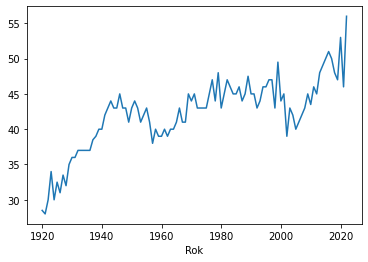

In [81]:
herectvo[herectvo["Gender"] == "muž"].groupby("Rok")["Věk"].median().plot()

<AxesSubplot:xlabel='Rok'>

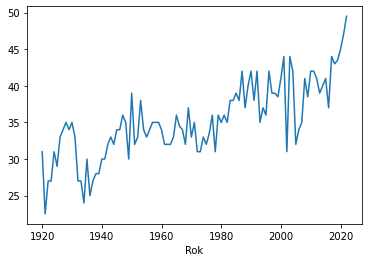

In [82]:
herectvo[(herectvo["Gender"] == "žena")].groupby("Rok")["Věk"].median().plot()

In [83]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

## Unikátní filmy

In [84]:
herectvo.groupby("Film")["Věk"].median().nlargest(10)

Film
Hmyz (401737)                               84.0
Tlumočník (401728)                          80.0
Dobře placená procházka (103374)            78.0
Až zařve lev (402204)                       76.0
Přežít svůj život (163876)                  76.0
Odborný dohled nad výkladem snu (401766)    75.0
Pamětnice (123955)                          75.0
Holka Ferrari Dino (65982)                  73.0
Pátá loď (401180)                           72.0
Školní výlet (181928)                       72.0
Name: Věk, dtype: float64

In [85]:
herectvo.groupby("Film")["Věk"].median().nsmallest(10)

Film
Potkal jsem ho v zoo (397759)                 11.0
Oliver Twist (37449)                          12.0
Cesta do pravěku (396218)                     15.0
Indiánské léto (8296)                         17.0
Leť, ptáku leť! (397205)                      17.0
Očima fotografky (400647)                     17.0
Žalman aneb Naslouchám tichu Země (401765)    17.0
Malé letní blues (396736)                     18.5
Panter čeká v 17,30 (396894)                  18.5
Stav ztroskotání (397418)                     18.5
Name: Věk, dtype: float64

In [86]:
pd.Series(herectvo[herectvo["Gender"] == "žena"].groupby(["Film","Rok"])["Jméno"].nunique() / herectvo.groupby("Film")["Jméno"].nunique()).sort_values().head(10)

Film                            Rok 
Mistři (27735)                  2004    0.023810
Atentát (396609)                1964    0.023810
Já, spravedlnost (396742)       1967    0.027778
Návrat čápů (56407)             2007    0.035714
Přežil jsem svou smrt (396405)  1960    0.035714
Tobruk (51759)                  2008    0.038462
Příhody pana Příhody (397376)   1982    0.040000
Čertí brko (401838)             2018    0.040000
Wilsonov (400602)               2015    0.041667
Tristan a Isolda (45297)        2005    0.041667
Name: Jméno, dtype: float64

#POZN: není to k mistrům fér, pár herců + celý hokejový tým. Při scrapování seskládat hrají v původním pořadí + vyfiltrovat 5!

In [87]:
pd.Series(herectvo[herectvo["Gender"] == "žena"].groupby(["Film","Rok"])["Jméno"].nunique() / herectvo.groupby("Film")["Jméno"].nunique()).sort_values().dropna().tail(10)

Film                                  Rok 
Špendlík na motýla (7788)             1994    0.75
Jiří Trnka: Nalezený přítel (401905)  2019    0.75
Hrad z písku (8249)                   1994    0.75
Poslouchej (402077)                   2019    0.75
Trestanci na Špilberku (395304)       1922    1.00
Cesta ven (400548)                    2014    1.00
Skokan (401277)                       2017    1.00
Pátá loď (401180)                     2017    1.00
Krajina mého srdce (28993)            2004    1.00
FAMU v kině 01 (402101)               2020    1.00
Name: Jméno, dtype: float64

## Ženské tvůrkyně

In [88]:
herectvo = herectvo.merge(rezie_gender, on="Film")

<AxesSubplot:xlabel='Rok'>

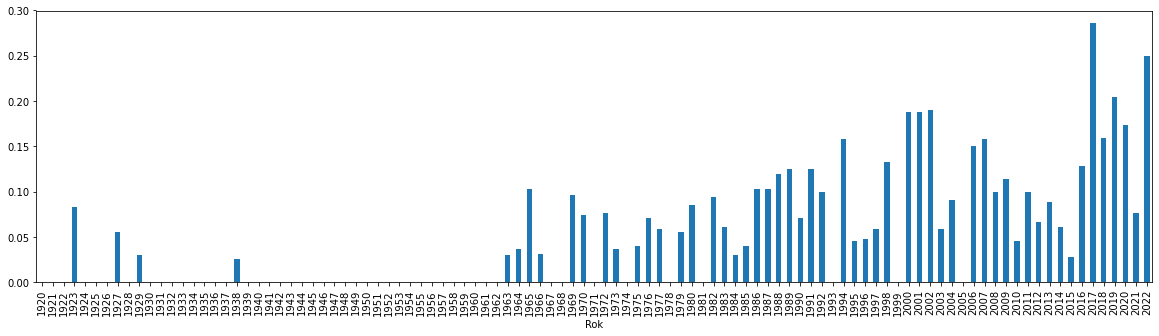

In [89]:
pd.Series((herectvo[herectvo["Režie gender"] == "žena"].groupby("Rok")["Film"].nunique()) / (herectvo.groupby("Rok")["Film"].nunique())).plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Rok'>

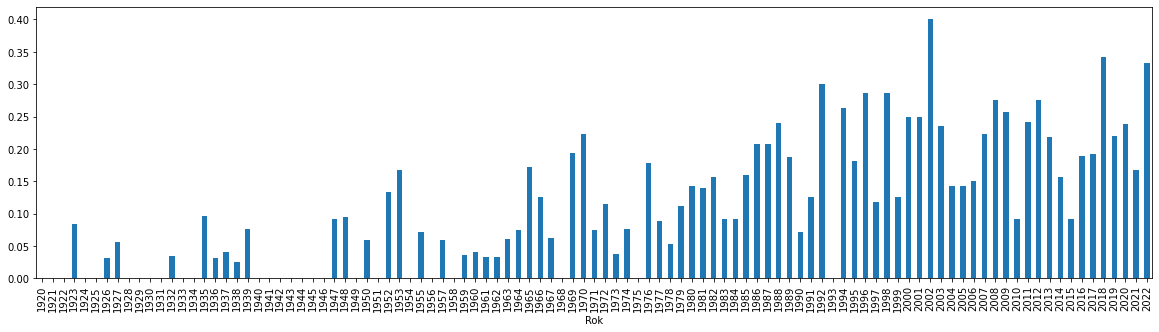

In [57]:
pd.Series((herectvo[herectvo["Scénář gender"] == "žena"].groupby("Rok")["Film"].nunique()) / (herectvo.groupby("Rok")["Film"].nunique())).plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Rok'>

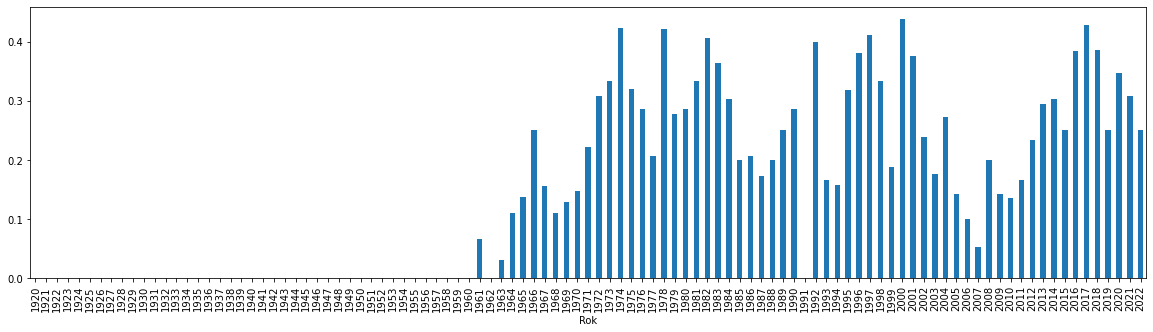

In [91]:
pd.Series((herectvo[herectvo["Dramaturg gender"] == "žena"].groupby("Rok")["Film"].nunique()) / (herectvo.groupby("Rok")["Film"].nunique())).plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Rok'>

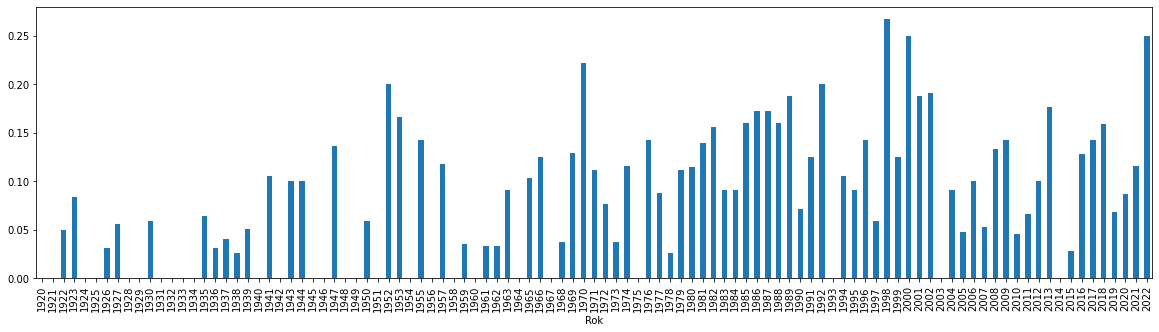

In [92]:
pd.Series((herectvo[herectvo["Námět gender"] == "žena"].groupby("Rok")["Film"].nunique()) / (herectvo.groupby("Rok")["Film"].nunique())).plot.bar(figsize = (20,5))

In [93]:
herectvo89 = herectvo[herectvo["Rok"] > 1989]

In [94]:
herectvo89[herectvo89["Režie gender"] == "žena"].groupby("Gender")["Jméno"].nunique()

Gender
muž     773
žena    484
Name: Jméno, dtype: int64

In [95]:
herectvo89[herectvo89["Režie gender"] == "muž"].groupby("Gender")["Jméno"].nunique()

Gender
muž     4927
žena    2141
Name: Jméno, dtype: int64

In [96]:
herectvo89[(herectvo89["Režie gender"] == "žena") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Režie gender"] == "žena")]["Role"].count()

0.3844510892780863

In [97]:
herectvo89[(herectvo89["Režie gender"] == "muž") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Režie gender"] == "muž")]["Role"].count()

0.2865593237173474

In [98]:
herectvo89[(herectvo89["Scénář gender"] == "žena") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Scénář gender"] == "žena")]["Role"].count()

0.3877113402061856

In [99]:
herectvo89[(herectvo89["Scénář gender"] == "muž") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Scénář gender"] == "muž")]["Role"].count()

0.2829924220842117

In [100]:
herectvo89[(herectvo89["Námět gender"] == "žena") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Námět gender"] == "žena")]["Role"].count()

0.40318554617853325

In [101]:
herectvo89[(herectvo89["Námět gender"] == "muž") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Námět gender"] == "muž")]["Role"].count()

0.27887416596184567

In [102]:
herectvo89[(herectvo89["Dramaturg gender"] == "žena") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Dramaturg gender"] == "žena")]["Role"].count()

0.3135089686098655

In [103]:
herectvo89[(herectvo89["Dramaturg gender"] == "muž") & (herectvo89["Gender"] == "žena")]["Role"].count() / herectvo89[(herectvo89["Dramaturg gender"] == "muž")]["Role"].count()

0.29818868174442864

<AxesSubplot:ylabel='Frequency'>

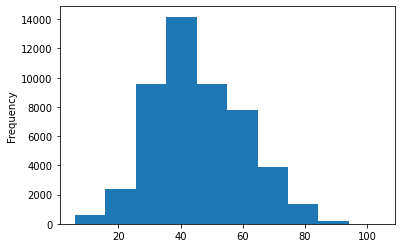

In [104]:
herectvo89[herectvo89["Gender"] == "muž"]["Věk"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

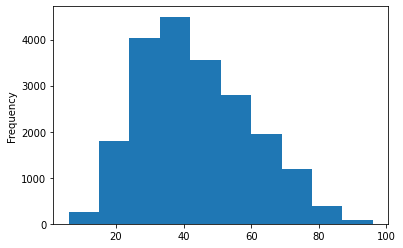

In [105]:
herectvo89[herectvo89["Gender"] == "žena"]["Věk"].plot.hist()